In [1]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [2]:
II = 0.36 # charge and discharge current
dch = pd.read_csv("in/KM_MT.001", sep="\s+", header = 0, names = ["t", "U"], skiprows=0, usecols=[0, 1], decimal=",")
dch["U"] = dch["U"]/1000
dch["Q"] = dch["t"] * II / 3600 * 1000 # mAh 

In [3]:
II2 = 0.018 # charge and discharge current
df_discharge = pd.read_csv("in/DCH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")
df_discharge["Q"] = df_discharge["t"] * II2 / 3600 * 1000 # mAh 

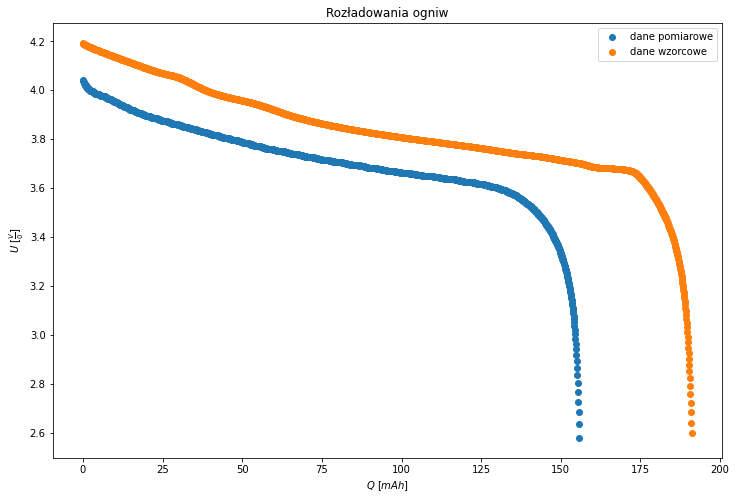

In [4]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(dch["Q"], dch["U"], 'o', label="dane pomiarowe")
ax.plot(df_discharge["Q"], df_discharge["U"], 'o', label="dane wzorcowe")
ax.set_xlabel(r"$Q$ [$mAh$]")
ax.set_ylabel(r"$U$ [$\frac{V}{0}$]")
ax.set_title("Rozładowania ogniw")
ax.legend()
fig.savefig("out/compare_discharge.jpg")

plt.show()

In [5]:
df_charge = pd.read_csv("in/CH18mA.txt", sep="\s+", skiprows=0, header=None, names=["t", "U"], usecols=[0, 1], decimal=",")
df_charge["Q"] = df_charge["t"] * II2 / 3600 * 1000 # mAh 

In [6]:
ch = pd.read_csv("in/KM_MT.003", sep="\s+", header = 0, names = ["t", "U"], skiprows=0, usecols=[0, 1], decimal=",")

ch["t0"] = ch["t"] - ch["t"][0]

ch["U"] = ch["U"]/1000
ch["Q"] = ch["t0"] * II / 3600 * 1000 # mAh 

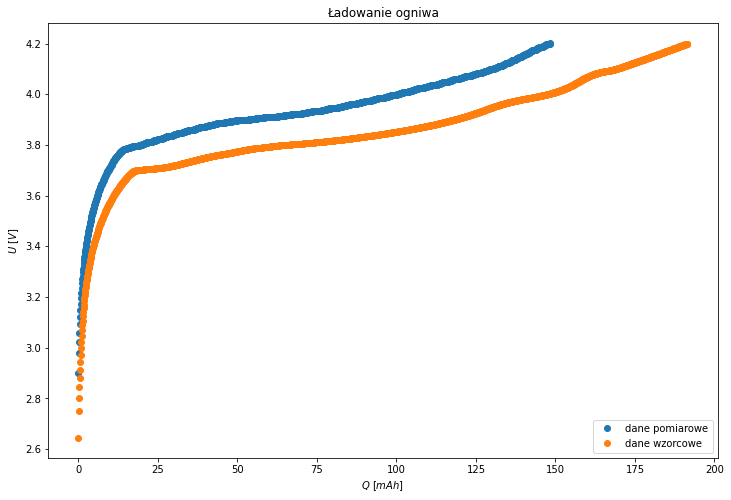

In [8]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(ch["Q"], ch["U"], 'o', label="dane pomiarowe")
ax.plot(df_charge["Q"], df_charge["U"], 'o', label="dane wzorcowe")

ax.set_xlabel(r"$Q$ [$mAh$]")
ax.set_ylabel(r"$U$ [$V$]")
ax.set_title("Ładowanie ogniwa")
ax.legend(loc=4)
fig.savefig("out/compare_charged.jpg")

plt.show()